<a href="https://colab.research.google.com/github/katsukiyamamoto/EU_M_Math/blob/main/Chap07_Ex_01_03_Cm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#7-1-2

import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

%matplotlib inline

%precision 3

'%.3f'

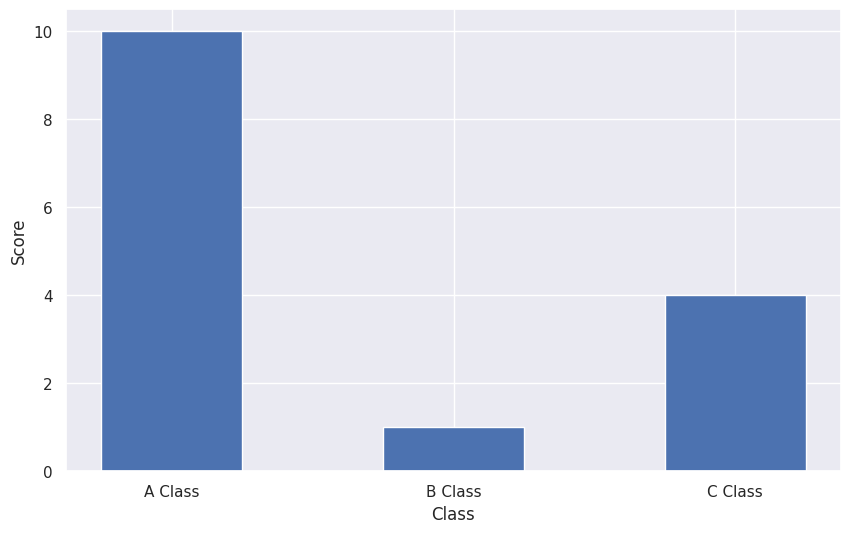

In [2]:
#7-2-1

x = [1,2,3]
y = [10,1,4]

plt.figure(figsize=(10,6))

plt.bar(x,y,align='center',width=0.5)

plt.xticks(x,['A Class','B Class','C Class'])

plt.xlabel('Class')
plt.ylabel('Score')

plt.grid(True)

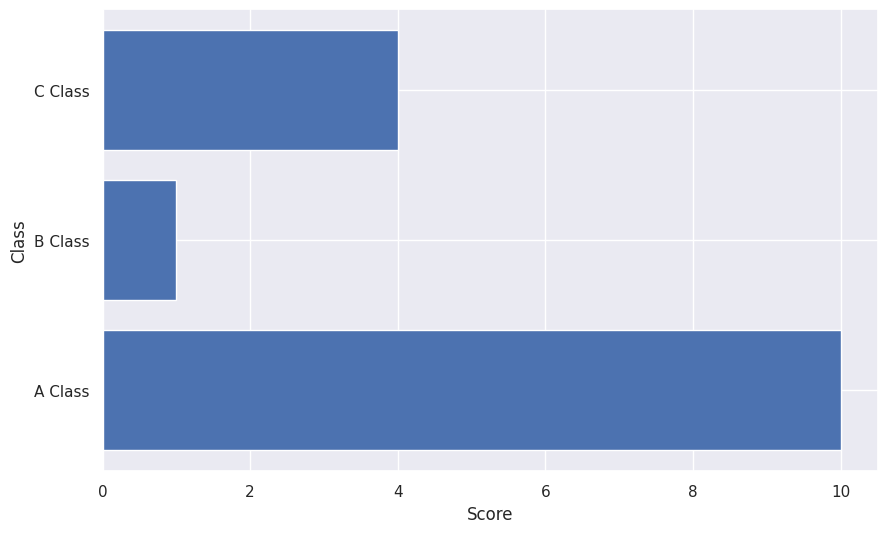

In [3]:
#7-2-1-1

x = [1,2,3]
y = [10,1,4]

plt.figure(figsize=(10,6))

plt.barh(x,y,align='center')

plt.yticks(x,['A Class','B Class','C Class'])

plt.ylabel('Class')
plt.xlabel('Score')

plt.grid(True)

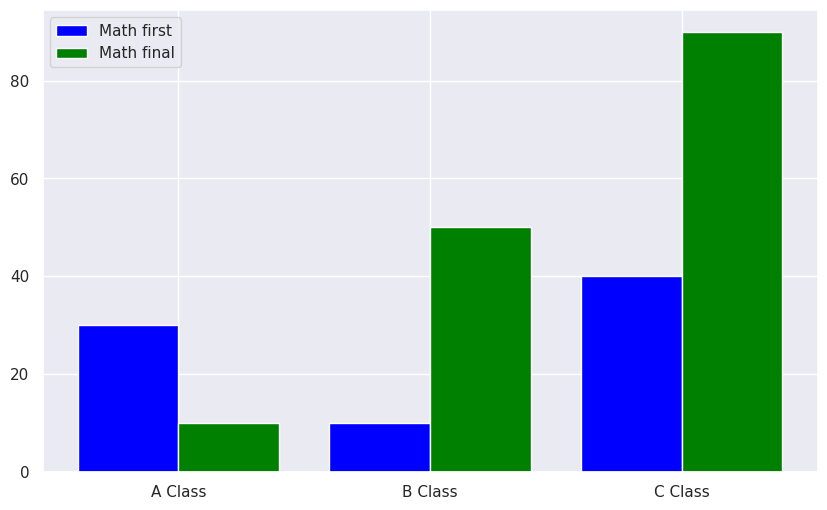

In [4]:
#7-2-1-2

y1 = np.array([30,10,40])
y2 = np.array([10,50,90])

x = np.arange(len(y1))

w = 0.4

plt.figure(figsize=(10,6))

plt.bar(x,y1,color='blue',width=w,label='Math first',align='center')
plt.bar(x+w,y2,color='green',width=w,label='Math final',align='center')

plt.legend(loc ='best')

plt.xticks(x+w/2,['A Class','B Class','C Class'])
plt.grid(True)

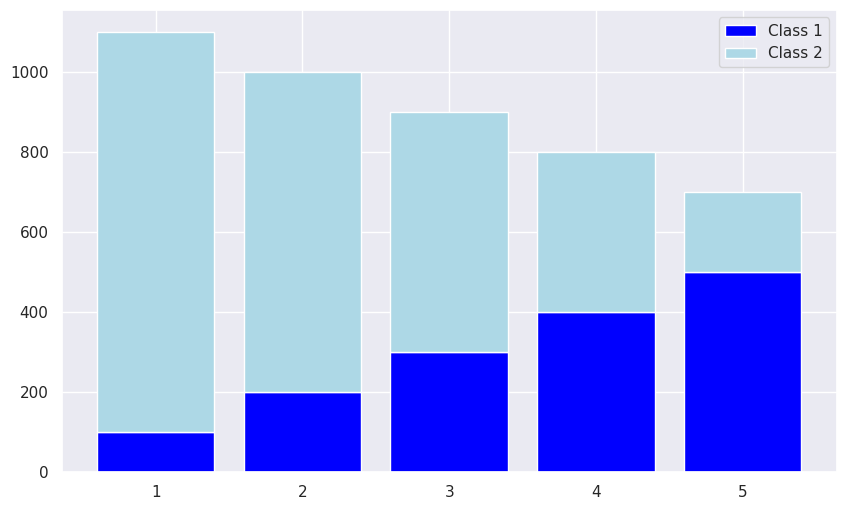

In [5]:
#7-2-1-3

height1 = np.array([100,200,300,400,500])
height2 = np.array([1000,800,600,400,200])

x = np.array([1,2,3,4,5])
plt.figure(figsize=(10,6))

p1 = plt.bar(x,height1,color='blue')
p2 = plt.bar(x,height2,color='lightblue',bottom=height1)

plt.legend((p1[0],p2[0]),('Class 1','Class 2'))

(-1.1998593997207165,
 1.1047438740833693,
 -1.0999843660947275,
 1.0999992555283205)

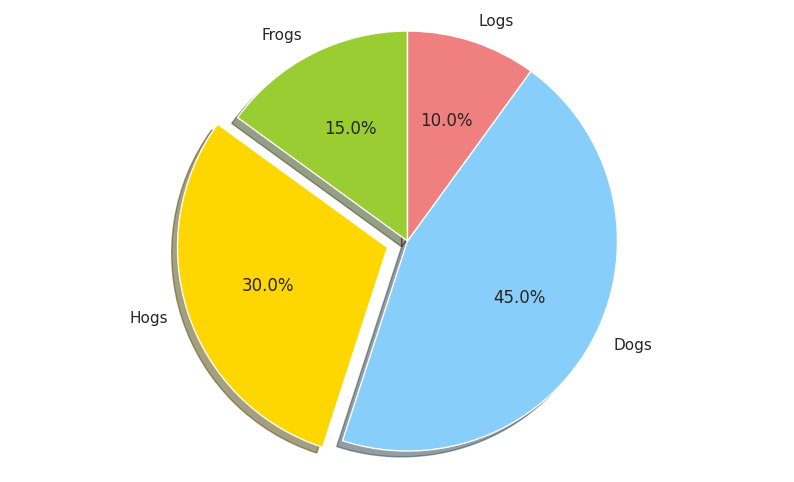

In [7]:
#7-2-2-1

labels = ['Frogs','Hogs','Dogs','Logs']
sizes = [15,30,45,10]
colors = ['yellowgreen','gold','lightskyblue','lightcoral']
explode=(0,0.1,0,0)

plt.figure(figsize=(10,6))

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)

plt.axis('equal')

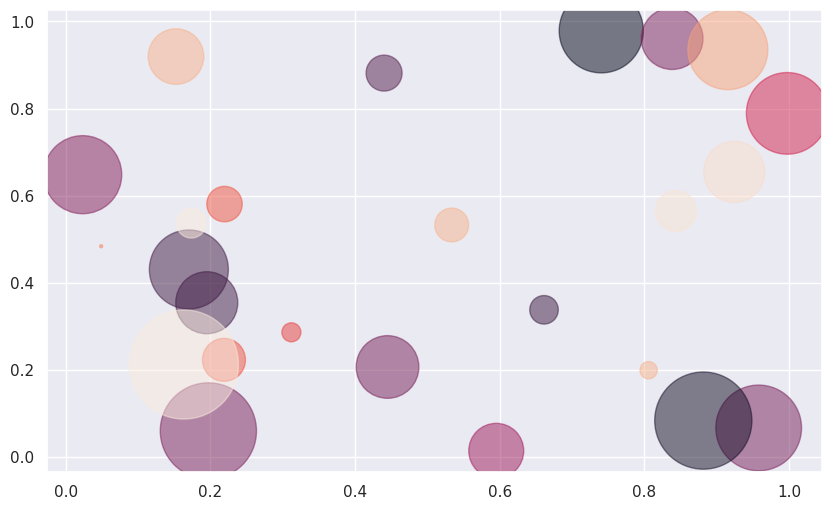

In [9]:
#7-2-2-2

N =25

x = np.random.rand(N)
y = np.random.rand(N)

colors = np.random.rand(N)

area = 10*np.pi*(15*np.random.rand(N))**2

plt.figure(figsize=(10,6))

plt.scatter(x,y,s=area,c=colors,alpha=0.5)
plt.grid(True)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(-1.0999975695197284,
 1.099999624688255,
 -1.0999999829323794,
 1.0999999991872562)

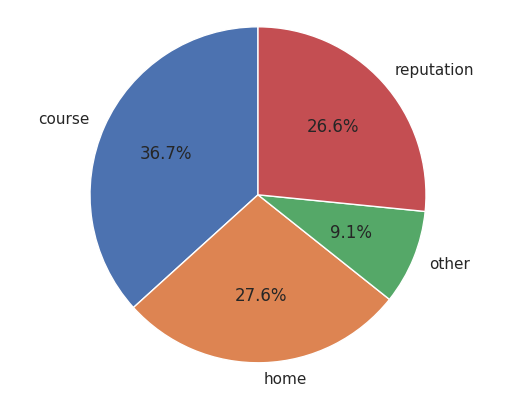

In [13]:
#練習問題7-1

student_data_math = pd.read_csv(f'/content/drive/My Drive/Colab Notebooks/student-mat.csv',sep=';')
student_data_math.groupby('reason').size().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.axis('equal')

Text(0, 0.5, 'G3 grade average')

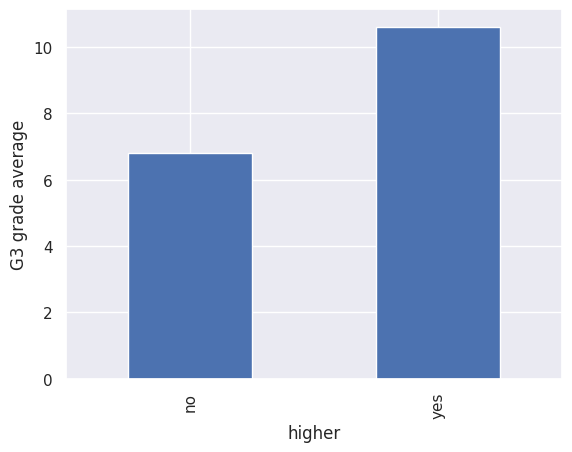

In [14]:
#練習問題7-2

student_data_math.groupby('higher')['G3'].mean().plot(kind='bar')
plt.xlabel('higher')
plt.ylabel('G3 grade average')

Text(0.5, 0, 'G3 grade average')

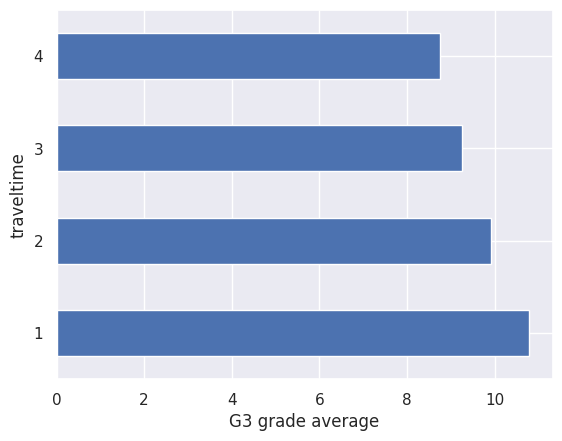

In [15]:
#練習問題7-3

student_data_math.groupby('traveltime')['G3'].mean().plot(kind='barh')
plt.xlabel('G3 grade average')

<Axes: >

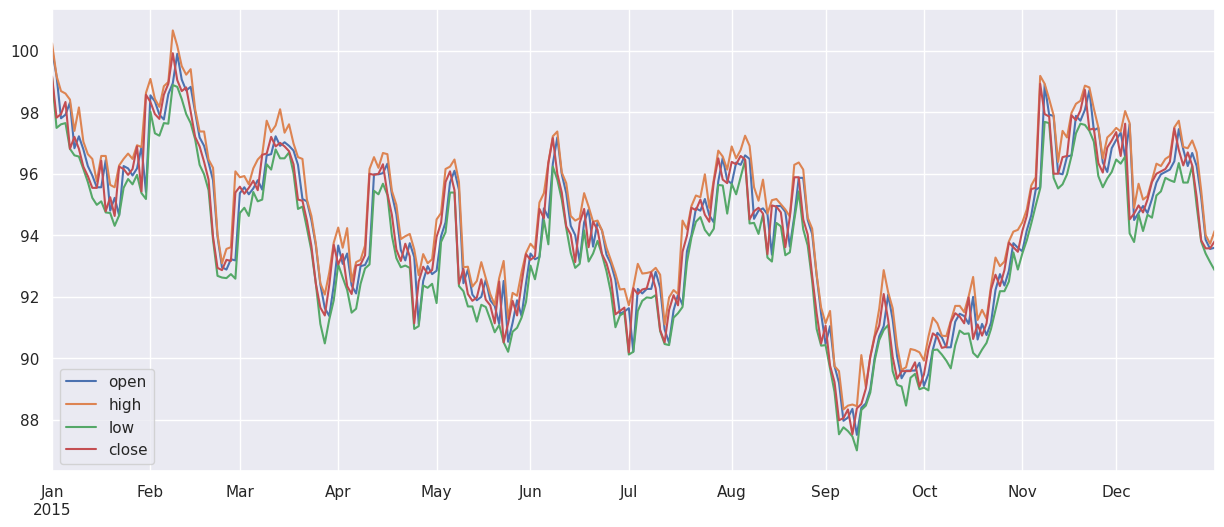

In [18]:
#7-3-1

idx = pd.date_range('2015/01/01','2015/12/31 23:59', freq='T')

dn = np.random.randint(2,size=len(idx))*2-1

rnd_walk = np.cumprod(np.exp(dn*0.0002))*100

df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

df.plot(figsize=(15,6), legend='best',grid=True)

In [20]:
#7-3-2

from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

init_notebook_mode(connected=True)

fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates=df.index)
fig.show(renderer="colab")

In [4]:
#総合問題7-1

import requests, zipfile
from io import StringIO
import io

zip_file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))

z.extractall()

dow_jones_index = pd.read_csv('dow_jones_index.data',sep=',')

dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [5]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [6]:
dow_jones_index.date = pd.to_datetime(dow_jones_index.date)

delete_dolchar = lambda x: str(x).replace('$','')

dow_jones_index.open = pd.to_numeric(dow_jones_index.open.map(delete_dolchar))
dow_jones_index.high = pd.to_numeric(dow_jones_index.high.map(delete_dolchar))
dow_jones_index.low = pd.to_numeric(dow_jones_index.low.map(delete_dolchar))
dow_jones_index.close = pd.to_numeric(dow_jones_index.close.map(delete_dolchar))
dow_jones_index.next_weeks_open = pd.to_numeric(dow_jones_index.next_weeks_open.map(delete_dolchar))
dow_jones_index.next_weeks_close = pd.to_numeric(dow_jones_index.next_weeks_close.map(delete_dolchar))

dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [7]:
dow_jones_index_stock_index = dow_jones_index.set_index(['date','stock'])

dow_jones_index_stock_index_unstack = dow_jones_index_stock_index.unstack()

dow_close_data = dow_jones_index_stock_index_unstack['close']

dow_close_data.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [8]:
corr_data = dow_close_data.corr()
corr_data

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


<Axes: xlabel='stock', ylabel='stock'>

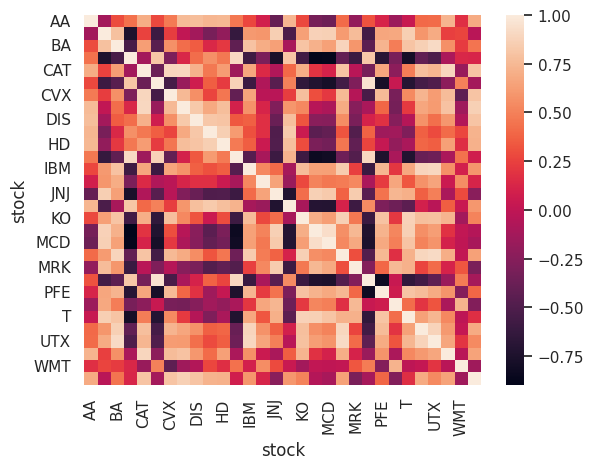

In [9]:
sns.heatmap(corr_data)

In [10]:
max_corr = 0
stock_1 = ''
stock_2 = ''

for i in range(0,len(corr_data)):
  print(
      corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1],
      corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0],
      corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
  )
  if max_corr < corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]:
    max_corr = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
    stack_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1]
    stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0]

print('[Max Corr]:',max_corr)
print('[Stock 1]:',stock_1)
print('[Stock 2]:',stock_2)

AA DIS 0.7724697655620214
AXP KRFT 0.8735103611554017
BA UTX 0.9163379610743169
BAC HPQ 0.9058167680009366
CAT DD 0.9028558103078965
CSCO MSFT 0.9537216645891365
CVX CAT 0.8894156562923724
DD CAT 0.9028558103078965
DIS DD 0.8269258130241477
GE HD 0.8582069310150242
HD GE 0.8582069310150242
HPQ BAC 0.9058167680009366
IBM UTX 0.8975523835362522
INTC BA 0.6910939563692001
JNJ KRFT 0.8612879882611021
JPM GE 0.830450859436039
KO T 0.868995241583572
KRFT MCD 0.9299213037922904
MCD KRFT 0.9299213037922904
MMM UTX 0.9136955626526879
MRK JNJ 0.8440270438854454
MSFT CSCO 0.9537216645891365
PFE T 0.806543944675414
PG MRK 0.7497131367292437
T KO 0.868995241583572
TRV MMM 0.8917262016156643
UTX BA 0.9163379610743169
VZ CAT 0.8903147891825165
WMT PG 0.7237055485083286
XOM DD 0.8635107559399798
[Max Corr]: 0.9537216645891365
[Stock 1]: 
[Stock 2]: MSFT


In [11]:
dow_close_data_subsets = dow_close_data[[stock_1,stock_2]]
dow_close_data_subsets.plot(subplots=True,grid=True)
plt.grid(True)

KeyError: "[''] not in index"

In [12]:
dow_close_data_rolling(center=False,window=5).mean().head(10)

NameError: name 'dow_close_data_rolling' is not defined

max volatility: CSCO
min volatility: KO


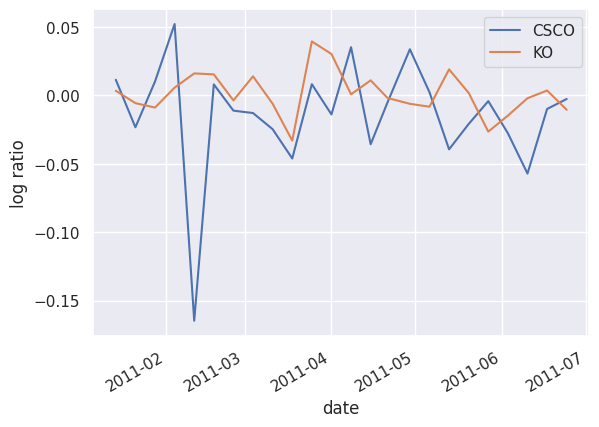

In [13]:
log_ratio_stock_close = np.log(dow_close_data/dow_close_data.shift(1))

max_vol_stock = log_ratio_stock_close.std().idxmax()
min_vol_stock = log_ratio_stock_close.std().idxmin()

print('max volatility:',max_vol_stock)
print('min volatility:',min_vol_stock)

log_ratio_stock_close[max_vol_stock].plot()
log_ratio_stock_close[min_vol_stock].plot()
plt.ylabel('log ratio')
plt.legend()
plt.grid(True)